In [12]:
import matplotlib.pyplot as plt
%matplotlib inline  

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('allnomineesTweets2.csv',
                 encoding='latin-1')

In [3]:
dataset=df.drop(['retweet'], axis=1)
len(dataset)

17726

In [4]:
dataset=dataset.drop_duplicates()
len(dataset)

17726

In [5]:
names = dataset['screen_name'].unique()

In [6]:
dataset = dataset.reset_index()

In [7]:
dataset.head()

,index,screen_name,tweets,retweetcount,favcount
0,0,@MichaelBennet,"Today, we honor the men and women who made the...",30,145
1,1,@MichaelBennet,It is ridiculous that we live in the only indu...,41,136
2,2,@MichaelBennet,The opioid crisis has devastated communities a...,16,67
3,3,@MichaelBennet,How do we create shared prosperity in this cou...,34,98
4,4,@MichaelBennet,We need a president who understands why Washin...,20,91


In [40]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
cachedStopWords = set(stopwords.words("english"))
newStopWords = ("https","http", "RT","co","rt","amp")
cachedStopWords.update((newStopWords))
for i in range(0, len(dataset)):
    try:
        review = re.sub('[^a-zA-Z]', ' ', dataset['tweets'][i])
        review = review.lower()
        review = review.split()
        ps = PorterStemmer()
        review = [ps.stem(word) for word in review if not word in cachedStopWords]
        review = ' '.join(review)
        corpus.append(review)
        #print(i)
    except:
        print(i)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\harsh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [41]:
cachedStopWords

{'RT',
 'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'amp',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'co',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'http',
 'https',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 

In [42]:
corpus = " ".join(corpus)

In [43]:
words = nltk.tokenize.word_tokenize(corpus)

In [44]:
from nltk import FreqDist
fdist1 = FreqDist(words) 

In [49]:
fdist1

FreqDist({'thank': 1319, 'today': 1159, 'presid': 1038, 'peopl': 1019, 'work': 866, 'make': 858, 'us': 818, 'day': 795, 'one': 793, 'trump': 791, ...})

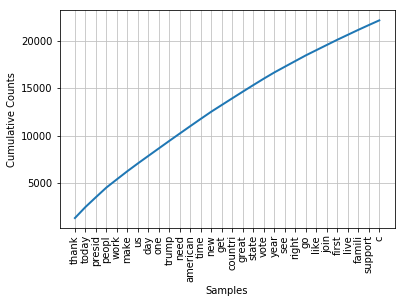

In [50]:
fdist1.plot(30, cumulative=True)